# General settings and loading of files

In [72]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

from IPython.display import display, Math, Latex
from matplotlib import cm

%matplotlib inline

pd.options.display.max_columns = 40  # Affy csv has 30 fields
pd.options.display.mpl_style = 'default'

mpl.rc('figure', figsize=(13, 7))
mpl.rc('axes', titlesize=17, labelsize=14)
mpl.rc('xtick', labelsize=11)
mpl.rc('ytick', labelsize=11)
mpl.rc('font', family='serif')
mpl.rc('legend', fontsize=15)

In [73]:
%run helpers/data_munging_functions.py
%run helpers/number_helpers.py

# Leer LAT-1 y discriminar Galanter Present vs. Missing

In [74]:
GALANTER_CSV = '~/tesina/galanter_SNPs.csv'

LAT1_CSV = '~/tesina/affy-LAT1/Axiom_GW_LAT.na35.annot.csv'  # 1.1Gb file!

# Smaller file for testing:
# LAT1_CSV_SMALL = "affy-LAT1/Axiom_GW_LAT.na35.annot.TRUNCATED.csv"

CHR_LENGTHS = '~/tesina/chr_len.csv'

In [75]:
%run discriminate_present_vs_missing.py

galanter, present, missing = discriminate_present_vs_missing(
    GALANTER_CSV, LAT1_CSV, dumpdir="dumpfiles")

In [76]:
print("{} Galanter AIMs".format(len(galanter)))
print("{} present in LAT".format(len(present)))
print("{} missing in LAT".format(len(missing)))

446 Galanter AIMs
180 present in LAT
266 missing in LAT


In [77]:
galanter.loc['rs13327370']

chr                   3
position      199228595
A1                    G
A2                    A
NAM_AF            0.011
EUR_AF             0.23
AFR_AF            0.922
population          AFR
LSBL(Fst)         0.606
LSBL(In)          0.365
Name: rs13327370, dtype: object

In [78]:
%run chromosome_lenghts.py

chr_lengths = read_chr_lengths(CHR_LENGTHS)
max_len = chr_lengths.total_length.max()

### Distancias entre los AIMs por cromosoma

In [79]:
chr_lengths.loc[3]

total_length    198295559
Name: 3, dtype: int64

In [80]:
galanter[galanter.chr == 3][galanter.position > chr_lengths.loc[3].total_length]

,chr,position,A1,A2,NAM_AF,EUR_AF,AFR_AF,population,LSBL(Fst),LSBL(In)
SNP rsID,,,,,,,,,,
rs13327370,3,199228595,G,A,0.011,0.23,0.922,AFR,0.606,0.365


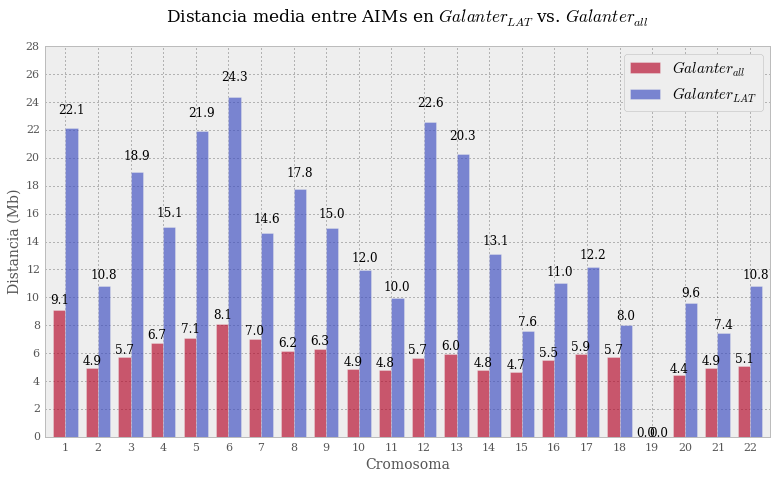

In [99]:
% run data_munging/distances_between_AIMs.py
% run SNP_distances_plots.py

galanter_vs_present_mean_distance_plot(galanter, present)
plt.show()

#### Discusión

* Las distancias medias son mucho mayores en $Galanter_{LAT}$ que en $Galanter_{all}$. En casos extremos, llega a más de 20 Mpb promedio entre AIMs, cuando esas distancias promedio no superan los 8 Mpb en el panel original.

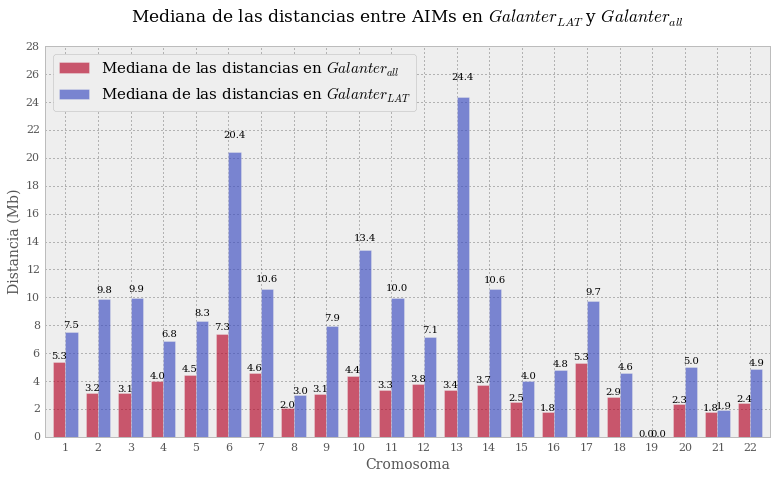

In [115]:
% run data_munging/distances_between_AIMs.py
% run SNP_distances_plots.py

galanter_vs_present_median_distance_plot(galanter, present)
plt.show()

### Discusión

__Nota__: hay un solo AIM en Galanter para el cromosoma 19, de modo que no se grafican distancias.

* En algunos casos extremos, hay hasta 1.4 Mpb (cromosoma 1) y 1 Mpb (cromosoma 8) de distancia entre dos AIMs contiguos.

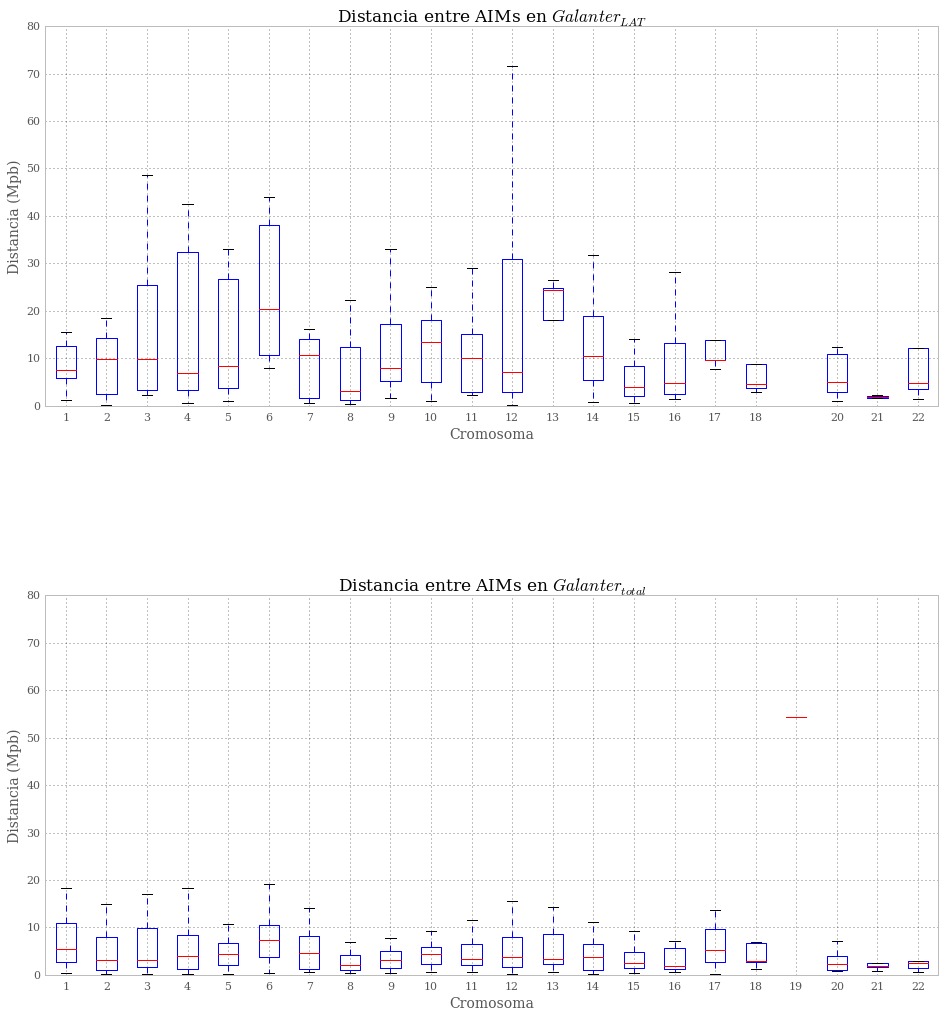

In [157]:
% run data_munging/distances_between_AIMs.py
% run SNP_distances_plots.py

ax1 = plt.subplot(211)
ax1 = distances_boxplot(present, ax=ax1, showfliers=False, showmeans=False,
                        title=r"Distancia entre AIMs en $Galanter_{LAT}$")

ax2 = plt.subplot(212, sharey=ax1)
ax2 = distances_boxplot(galanter, ax=ax2, showfliers=False, showmeans=False,
                        title=r"Distancia entre AIMs en $Galanter_{total}$")

f = ax2.figure
f.set_figheight(17)
f.set_figwidth(16)

plt.show()

**NOTA**: Con los outliers (`showfliers=True`) la diferencia se agranda aún más.


### Test para ver si es significativa la diferencia en distribuciones

In [ ]:
from scipy import stats

In [ ]:
# Remove annoying NaN for the test
df = snp_distances.dropna(axis=0, how='any')

In [ ]:
# t_critical, p_value = 
stats.ttest_ind(
    df['mean_distance_galanter'].values,
    df['mean_distance_present'].values, 
)

### Graficar los cromosomas

In [ ]:
galanter_positions = galanter[['chr', 'position']]
present_positions = present[['chr', 'position']]

In [ ]:
# Chromosomes
ax = chr_lengths.plot(kind="barh", width=0.50, figsize=(16, 20),
                      color="b", edgecolor="lightgray", facecolor="snow",
                      linewidth=3, zorder=0, label="Cromosomas")

# Present AIMs
ax.scatter(y=present.chr.values - 1, x=present.position.values, zorder=1,
           marker="|", color="seagreen", linewidth=2, s=600,
           label="Galanter AIMs presentes en LAT")

# Missing AIMs
ax.scatter(y=missing.chr.values - 1, x=missing.position.values, 
           marker="s", color="salmon", alpha=1, linewidth=2, s=7,
           label="Galanter AIMs ausentes en LAT")

ax.set_xlim([0, max_len * 1.05])

ax.set_xlabel("Posición (Mb)")
ax.set_ylabel("Cromosoma")

yinterval = 10**7
ax.set_xticks(np.arange(0, max_len + yinterval, yinterval) // 1)
ax.set_xticklabels(np.arange(0, max_len + yinterval, yinterval) // 10**6)

ax.legend()
plt.show()

# FIXME: bars legend

### Diferenciar por población

In [ ]:
missing_AFR = missing[missing.population == "AFR"]
missing_EUR = missing[missing.population == "EUR"]
missing_NAM = missing[missing.population == "NAM"]
print('{} AFR missing'.format(len(missing_AFR)))
print('{} NAM missing'.format(len(missing_NAM)))
print('{} EUR missing'.format(len(missing_EUR)))

In [ ]:
present_AFR = present[present.population == "AFR"]
present_EUR = present[present.population == "EUR"]
present_NAM = present[present.population == "NAM"]
print('{} AFR present'.format(len(present_AFR)))
print('{} NAM present'.format(len(present_NAM)))
print('{} EUR present'.format(len(present_EUR)))

In [ ]:
# Chromosomes
ax = chr_lengths.plot(kind="barh", width=0.50, figsize=(16, 20),
                      color="b", edgecolor="lightgray", facecolor="snow",
                      linewidth=3, zorder=0, label="Cromosomas")

# Present AIMs
ax.scatter(y=present_AFR.chr.values - 1, x=present_AFR.position.values, zorder=1,
           marker="|", color="black", linewidth=2, s=600,
           label="Galanter AIMs presentes en LAT")
ax.scatter(y=present_EUR.chr.values - 1, x=present_EUR.position.values, zorder=1,
           marker="|", color="steelblue", linewidth=2, s=600,
           label="Galanter AIMs presentes en LAT")
ax.scatter(y=present_NAM.chr.values - 1, x=present_NAM.position.values, zorder=1,
           marker="|", color="chocolate", linewidth=2, s=600,
           label="Galanter AIMs presentes en LAT")

# Missing AIMs
ax.scatter(y=missing.chr.values - 1, x=missing.position.values, 
           marker="s", color="salmon", alpha=1, linewidth=2, s=7,
           label="Galanter AIMs ausentes en LAT")

ax.set_xlim([0, max_len * 1.05])

ax.set_xlabel("Posición (Mb)")
ax.set_ylabel("Cromosoma")

yinterval = 10**7
ax.set_xticks(np.arange(0, max_len + yinterval, yinterval) // 1)
ax.set_xticklabels(np.arange(0, max_len + yinterval, yinterval) // 10**6)

ax.invert_yaxis()
ax.tick_params(labeltop="on")

ax.legend(prop={'size': 17}, loc="center right")
plt.show()

# FIXME: bars legend

**TODO**: Conseguir las longitudes cromosomales exactas, el #3 parece estar mal

In [ ]:
num_format(missing[missing.chr == 3].position.max())

In [ ]:
num_format(chr_lengths.loc[3, 'total_length'])

**TODO**: Visualize with special software, tipo http://visualization.ritchielab.psu.edu/phenograms/examples

## Diferenciar por población de referencia, present vs galanter

In [ ]:
galanter_population_ratios = galanter.population.value_counts() / \
                             galanter.population.count()
galanter_population_ratios

In [ ]:
present_population_ratios = present.population.value_counts() / \
                            present.population.count()
present_population_ratios    

In [ ]:
figure, axes = plt.subplots(1, 2)

# RATIOS
pop_ratios = pd.DataFrame({
    'present_population_ratios': present_population_ratios,
    'galanter_population_ratios': galanter_population_ratios
})

ax1 = pop_ratios.plot(ax=axes[0], kind="bar", color=['steelblue', 'lightgreen'], rot=0)
ax1.set_ylabel("Proporción")
ax1.set_xlabel("Población")
ax1.set_title("Proporción de AIMs de cada población\nen $Galanter_{todos}$ vs. $Galanter_{LAT-1}$",
             y=1.025)
ax1.set_ylim([0, 1])
ax1.legend(["$Galanter_{todos}$", "$Galanter_{LAT-1}$"])

annotations = annotate_bars(ax1, decimals=2, fontsize=12)

# COUNTS
pop_count = pd.DataFrame({
    'present_by_population': present.population.value_counts(),
    'missing_by_population': missing.population.value_counts(),
#     'galanter_by_population': galanter.population.value_counts()
})

ax2 = pop_count.plot(ax=axes[1], kind="bar", color=['tomato', 'lightgreen'], rot=0)
ax2.set_ylabel("% de AIMs en cada panel")
ax2.set_xlabel("Población")
ax2.set_ylim([0, 150])
ax2.set_title("Galanter AIMs presentes vs. ausentes\nen LAT-1, por población", y=1.025)
ax2.legend(["$Galanter_{\sim LAT-1}$", "$Galanter_{LAT-1}$"])

annotations = annotate_bars(ax2, decimals=0)

plt.show()

### Discusión

* Los AIMs de Galaner presentes en LAT-1 tienen proporciones poblacionales diferentes a las proporciones del total del panel. En $Galanter_{LAT-1}$
    - la proporción de AFR es .08 mayor
    - la proporción de EUR es .06 menor
    - la proporción de NAM es .03 menor
* Problema: El hecho de que nos quedemos con más AFR en proporción y menos EUR afectará la predición?

**TODO**: mergear estos dos últimos gráficos o al menos ponerlos lado a lado en la misma figure

# Datos de 1000 genomas

Download script:

In [ ]:
# %load /home/juan/tesina/1000genomes/ftp_download_1000_genomes.py

Descomprimir cada \*.vcf.gz con **`bgzip -d <vcf.gz file>`**

### Extraer los AIMs de interés de los \*.vcf de cromosomas completos

In [ ]:
from glob import glob
import os

def chr_file(chr):
    return ("ALL.chr{}.phase3_shapeit2_mvncall_integrated_v5a"
            ".20130502.genotypes.vcf.gz".format(chr))

def vcf_extract_command(chromosome):
    command = ("vcftools --gzvcf {chr_file} --snps {snps_file} "
               "--recode --keep-INFO-all --out chr_{chr}_SNPs")
    return command.format(**{
        'chr_file': chr_file(chromosome),
#         'snps_file': "galanter_snps_in_chr{}".format(chromosome),
        'snps_file': "galanter_snps",
        'chr': chromosome
    })

os.chdir("/home/juan/tesina/1000genomes")

rs_IDs = galanter.index.values
filename = "galanter_snps"
with open(filename, "w") as f:
    [f.write(rs + "\n") for rs in rs_IDs]

commands = []    
for chromosome in galanter.chr.unique():
#     filename = "galanter_snps_in_chr{}".format(chromosome)
#     rs_IDs = galanter[galanter.chr == chromosome].index.values
    commands.append(vcf_extract_command(chromosome))

In [ ]:
commands[0].split()

In [ ]:
print("""
    I used this cell to extract all Galanter SNPs from the huge compressed
    *.vcf.gz files from 1000genomes. It was a one time run, unnecessary now.
    The *.recode.* files are generated and then you use those.
    Just keeping the code in case I need it again.
""")

# import subprocess

# for command in commands:
#     print(command)
#     subprocess.call(command.split())  # WARNING: This takes a while

## Leer el .vcf de cada AIM y obtener sus frecuencias

### Población de cada muestra

Ejemplo de la data de subpoblaciones que busco, para rs2585897:

http://browser.1000genomes.org/Homo_sapiens/Variation/Population?db=core;r=13:21398479-21399479;v=rs2585897;vdb=variation;vf=2188197

In [134]:
fn = "/home/juan/tesina/1000genomes/integrated_call_samples_v3.20130502.ALL.panel"

%run 1000genomes_data.py
samples = create_populations_df(fn)

### Leer los .vcf de 1000 genomas (filtrados por Galanter) 

In [153]:
# TODO: get this in a .py script!
# https://pyvcf.readthedocs.org/en/latest/API.html#vcf-model-record


%run 1000genomes_data.py
vcf_filenames = glob("/home/juan/tesina/1000genomes/chr_22*recode*")  # remove the 21
df_1000genomes = create_1000genomes_df_from_vcf(vcf_filenames)
df_1000genomes

,AA,AC,AF,AFR_AF,ALT,AMR_AF,AN,CHROM,DP,EAS_AF,EUR_AF,FORMAT,NS,POS,QUAL,REF,SAS_AF,VT,alleles,call_rate,heterozygosity,is_transition,nucl_diversity,samples_genotypes,var_subtype,var_type
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
rs5748014,A|||,2680,0.535144,0.7504,A,0.5735,5008,22,14304,0.7123,0.2684,GT,2504,19148721,100,C,0.3088,SNP,"[C, A]",1,0.497530,False,0.497629,"[(HG00096, 1), (HG00097, 0), (HG00099, 2), (HG...",tv,snp
rs5754506,C|||,1388,0.277157,0.7935,C,0.1354,5008,22,20504,0.0308,0.1233,GT,2504,33683735,100,T,0.0920,SNP,"[T, C]",1,0.400682,True,0.400762,"[(HG00096, 0), (HG00097, 0), (HG00099, 0), (HG...",ts,snp
rs132663,A|||,2239,0.447085,0.1044,T,0.5764,5008,22,18180,0.8085,0.3579,GT,2504,36563024,100,A,0.5378,SNP,"[A, T]",1,0.494400,False,0.494499,"[(HG00096, 2), (HG00097, 1), (HG00099, 1), (HG...",tv,snp
rs5757362,C|||,3632,0.725240,0.9523,C,0.4164,5008,22,19141,0.8125,0.6243,GT,2504,39306080,100,T,0.6513,SNP,"[T, C]",1,0.398534,True,0.398614,"[(HG00096, 2), (HG00097, 2), (HG00099, 2), (HG...",ts,snp
rs470113,G|||,1047,0.209065,0.1248,G,0.4597,5008,22,22002,0.2679,0.1561,GT,2504,40729614,100,A,0.1391,SNP,"[A, G]",1,0.330714,True,0.330780,"[(HG00096, 0), (HG00097, 0), (HG00099, 0), (HG...",ts,snp
rs9611566,c|||,1122,0.224042,0.0530,T,0.5130,5008,22,18234,0.0754,0.2425,GT,2504,41768625,100,C,0.3845,SNP,"[C, T]",1,0.347694,True,0.347763,"[(HG00096, 1), (HG00097, 1), (HG00099, 0), (HG...",ts,snp
rs16990991,G|||,1427,0.284944,0.0439,A,0.4712,5008,22,17737,0.5744,0.2266,GT,2504,44167684,100,G,0.2403,SNP,"[G, A]",1,0.407502,True,0.407583,"[(HG00096, 1), (HG00097, 1), (HG00099, 0), (HG...",ts,snp
rs1557553,c|||,916,0.182907,0.0749,T,0.4280,5008,22,19211,0.2659,0.0924,GT,2504,44760984,100,C,0.1626,SNP,"[C, T]",1,0.298905,True,0.298964,"[(HG00096, 0), (HG00097, 0), (HG00099, 0), (HG...",ts,snp
rs801712,G|||,2061,0.411542,0.7489,G,0.5231,5008,22,19937,0.2619,0.2048,GT,2504,47090243,100,C,0.2434,SNP,"[C, G]",1,0.484350,False,0.484447,"[(HG00096, 0), (HG00097, 0), (HG00099, 1), (HG...",tv,snp


### Convertir 'samples_genotypes' en frecuencias poblacionales!

In [ ]:
genotypes = df_1000genomes['samples_genotypes']
genotypes.head(2)

In [ ]:
from collections import defaultdict, OrderedDict

def snp_genotypes_to_allele_freqs(snp_genotypes):
    """Returns a dict with { population_1 : ref_allele_frequency,
    population_2: ... }"""
    
    allele_count = defaultdict(lambda: [0, 0])
    codes = {0: 'ref_homocygote', 1: 'heterocygote', 2: 'alt_homocygote'}
    for sample_name, genotype_code in snp_genotypes:
        population = samples.loc[sample_name].population
        if codes[genotype_code] == 'ref_homocygote':
            allele_count[population][0] += 2
        elif codes[genotype_code] == 'heterocygote':
            allele_count[population][0] += 1
            allele_count[population][1] += 1
        elif codes[genotype_code] == 'alt_homocygote':
            allele_count[population][1] += 2

    freq = {}
    for population, (ref_allele_count, alt_allele_count) in allele_count.items():
        total_alleles = ref_allele_count + alt_allele_count
        freq[population] = round(ref_allele_count / total_alleles, 2)

    return freq

In [ ]:
dump_filename = "galanter_snps_frequencies_in_1000genomes.csv"

if os.path.isfile(dump_filename):
    subpopulation_freqs = pd.read_csv(dump_filename, index_col='ID')
else:
    # This takes a while
    freqs_as_dicts = genotypes.apply(snp_genotypes_to_allele_freqs)
    subpopulation_freqs = pd.DataFrame(freqs_as_dicts.values.tolist(),
                                       index=freqs_as_dicts.index)
    subpopulation_freqs.to_csv(dump_filename)

In [ ]:
superpopulation_freqs = df_1000genomes.filter(regex="AF")
for field in superpopulation_freqs:
    float_series = superpopulation_freqs[field].apply(lambda x: round(x[0],2))
    superpopulation_freqs[field] = float_series

In [ ]:
frequencies_1000g = pd.concat([subpopulation_freqs, superpopulation_freqs], axis=1)
frequencies_1000g = frequencies_1000g.rename(columns={
    'AFR_AF': 'AFR', 'AMR_AF': 'AMR', 'EAS_AF': 'EAS',
    'EUR_AF': 'EUR', 'SAS_AF': 'SAS'})

# Comparar los dos dataframes: Galanter y 1000Genomes

### Comparar SNPs

In [ ]:
print(len(df_1000genomes))
print(len(galanter))

TODO: Quién falta?

### Chequear AF

### Ver qué subpoblaciones se van en $Galanter_{missing}$ y cuáles quedan

In [ ]:
dumpfile = "population_names.csv"

if os.path.isfile(dumpfile):
    population_names = pd.read_csv(dumpfile, index_col='Population Code')
else:
    url = "http://www.1000genomes.org/category/frequently-asked-questions/population"
    df = pd.read_html(url)[0]  # First table in the page
    df.columns = df.iloc[0]
    df = df.iloc[1:, :3].set_index('Population Code')
    df.to_csv(dumpfile)
    population_names = df

population_names.head(1)

In [ ]:
def whois(pop_code):
    return population_names.loc[pop_code]['Population Description']

In [ ]:
whois('ACB')

In [ ]:
def plot_mean_freqs(df, title=""):
    df = df.join(frequencies_1000g).iloc[:, 4:].drop(['LSBL(Fst)', 'LSBL(In)'], axis=1)
    ax = df.mean().plot(kind='bar', color='cornflowerblue', figsize=(18,6), width=0.75)
    for bar in ax.patches[:3]:
        bar.set_color('coral')
    for bar in ax.patches[-6:]:
        bar.set_color('coral')
    ax.set_ylim(0,1)
    ax.set_title(title)
    ax.axhline(0.5, color='k', linestyle='--')
    annotate_bars(ax, decimals=2, fontsize=10)
    plt.show()

In [ ]:
plot_mean_freqs(missing, 'Promedio de frecuencias alélicas en $Galanter_{OUT}$, por población')

In [ ]:
plot_mean_freqs(galanter, 'Promedio de frecuencias alélicas en $Galanter_{total}$, por población')

In [ ]:
plot_mean_freqs(present, 'Promedio de frecuencias alélicas en $Galanter_{LAT-1}$, por población')

#### t test para comparar las dos series

In [ ]:
extract_mean_freqs = lambda df: df.join(frequencies_1000g).iloc[:, 11:-6].mean()

galanter_mean_frequencies = extract_mean_freqs(galanter)
missing_mean_frequencies = extract_mean_freqs(missing)
present_mean_frequencies = extract_mean_freqs(present)

# t-test assumes equal variances between the two sets?

print(galanter_mean_frequencies.var())
print(missing_mean_frequencies.var())

In [ ]:
import scipy

ntest, p_val = scipy.stats.mstats.normaltest(present_mean_frequencies)
print("Galanter missing:")
m("$p = {}$".format(round(p_val,3)))

ntest, p_val = scipy.stats.mstats.normaltest(galanter_mean_frequencies)
print("Galanter_total:")
m("$p = {}$".format(round(p_val, 3)))

>the farther away the observed or measured sample mean is from the hypothesized mean, the lower the probability (i.e., the p-value) that the null hypothesis is true.

* $Galanter_{total}$ tiene un p-value bajo (0.01), de modo que la $H_0$ no parece verdadera. Es decir, $Galanter_{total}$ no estaría normalmente distribuido.
* $Galanter_{missing}$, por otro lado, tiene un p-value más alto (0.10), pero no tanto, de modo que al menos con una confianza del 90% podemos decir que no está normalmente distribuido.
* Lo que no entiendo del todo es qué implicaría que sí (o que no) esté normalmente distribuido para el panel de Galanter. La selección de SNPs no es azarosa, por qué habríamos de esperar eso?

In [ ]:
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 10000)
ntest, p_val = scipy.stats.mstats.normaltest(s)
print(ntest, p_val)

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(galanter_mean_frequencies, present_mean_frequencies)
print("t = {}".format(round(t_stat, 2)))
print("p_value = {}".format(round(p_val, 2)))

In [ ]:
ax = plt.subplot(111)
ax.hist(galanter_mean_frequencies, 10, alpha=.6)
ax.hist(missing_mean_frequencies, 20, alpha=.6)
ax.legend(["$Galanter_{total}$", "$Galanter_{LAT-1}$"])
plt.show()

### Discusión

* El panel completo $Galanter_{total}$ está balanceado en cuanto a frecuencias alélicas por población: la mayoría se ubica en un promedio de alrededor de 0.57, para cada subpoblación, con un desvío muy bajo: 0.013.
* Ninguna subpoblación parece haber sido afectada en particular por la subselección de SNPs. Todas las frecuencias alélicas se mantienen entre 0.5 y 0.6, rango que incluye también a todas las frecuencias por subpoblación del panel original.
* El t-test ? Si la $H_0$ es que ambas medias son estadíticamente iguales, entonces se confirmó?

### Comparar posiciones (Galanter las tiene diferentes?)

In [ ]:
positions = galanter[['chr', 'position']].join(df_1000genomes[['CHROM', 'POS']])
positions.columns = ['chr_galanter', 'pos_galanter', 'chr_1000g', 'pos_1000g']
positions.head(1)

In [ ]:
positions['pos_diff'] = positions['pos_galanter'] - positions['pos_1000g']

In [ ]:
positions.head()

In [ ]:
galanter_heter = galanter.join(df_1000genomes, rsuffix='_').heterozygosity
missing_heter = missing.join(df_1000genomes, rsuffix='_').heterozygosity

ax = plt.subplot(111)
ax.boxplot([galanter_heter, missing_heter])
ax.set_xticklabels([
    '$Galanter_{total}$',
    '$Galanetr_{LAT-1}$',
])
plt.show()